# First Principles Thinking

* Step 1: Identify any assumptions that you may have (batteries are $600/KwH - they're too expensive)
* Step 2: Breakdown the issues (the fundamentals - what materials go into a battery? Can I find them for cheap?)
* Step 3: Create new solutions (use your fundamental analysis and knowledge to create a solution)

https://www.youtube.com/watch?v=NV3sBlRgzTI

```
bins=[0, 13, 19, 61, sys.maxsize]
labels=['<12', 'Teen', 'Adult', 'Older']
(
  pd.read_csv('data/train.csv')
    .pipe(replace_age_na, pclass_age_map)
    .query('Embarked == "S"')
    .assign(ageGroup = lambda df: pd.cut(df['Age'], bins=bins, labels=labels))
    .pivot_table(
        values='Survived', 
        columns='Pclass', 
        index='ageGroup', 
        aggfunc='mean')
    .rename_axis('', axis='columns')
    .rename('Class {}'.format, axis='columns')
    .style.format('{:.2%}')
)

```



In [46]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [47]:
%cd '/content/drive/My Drive/Kaggle'

/content/drive/My Drive/Kaggle


In [48]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

df = pd.read_csv('titanic_train.csv')
df.head()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0


In [49]:
df.dtypes

passenger_id      int64
pclass            int64
name             object
sex              object
age             float64
sibsp             int64
parch             int64
ticket           object
fare            float64
cabin            object
embarked         object
boat             object
body            float64
home.dest        object
survived          int64
dtype: object

In [50]:
df.drop(['passenger_id','name','ticket','cabin','boat','body','home.dest'], 
        axis=1,
        inplace=True)

df.isna().sum()

pclass        0
sex           0
age         174
sibsp         0
parch         0
fare          1
embarked      1
survived      0
dtype: int64

In [51]:
df.dtypes

pclass        int64
sex          object
age         float64
sibsp         int64
parch         int64
fare        float64
embarked     object
survived      int64
dtype: object

In [52]:
df.age.fillna(value=df.age.mean(), axis=0, inplace=True)
df.isna().sum()

pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        1
embarked    1
survived    0
dtype: int64

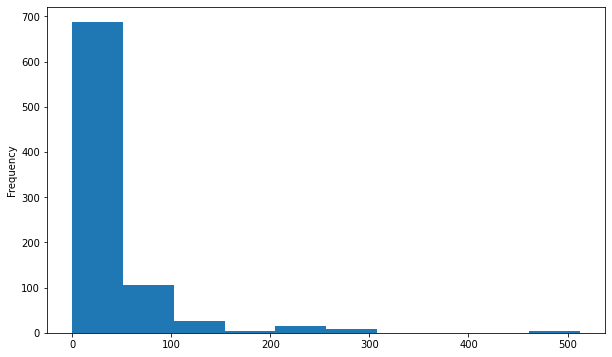

In [53]:
import matplotlib.pyplot as plt
df.fare.plot.hist(figsize=(10,6))

In [54]:
df.fare = df.fare.dropna(axis=0)
df.embarked = df.embarked.dropna(axis=0)

In [55]:
df.isna().sum(), len(df)

(pclass      0
 sex         0
 age         0
 sibsp       0
 parch       0
 fare        1
 embarked    1
 survived    0
 dtype: int64, 850)

In [56]:
df.loc[df.embarked.isna()]

,pclass,sex,age,sibsp,parch,fare,embarked,survived
109,1,female,38.0,0,0,80.0,NaN,1


In [57]:
df.embarked.fillna(value='S', axis=0, inplace=True)
df.fare.fillna(value=df.fare.mean(),axis=0,inplace=True)
df.isna().sum()

pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
survived    0
dtype: int64

In [58]:
len(df)

850

In [59]:
df.dtypes

pclass        int64
sex          object
age         float64
sibsp         int64
parch         int64
fare        float64
embarked     object
survived      int64
dtype: object

In [60]:
df_1 = pd.get_dummies(df,columns=['sex','embarked'])
df_1.dtypes

pclass          int64
age           float64
sibsp           int64
parch           int64
fare          float64
survived        int64
sex_female      uint8
sex_male        uint8
embarked_C      uint8
embarked_Q      uint8
embarked_S      uint8
dtype: object

In [61]:
df_1.head()

,pclass,age,sibsp,parch,fare,survived,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,3,29.519847,0,0,7.7333,1,1,0,0,1,0
1,3,38.000000,0,0,8.6625,0,0,1,0,0,1
2,3,30.000000,1,1,24.1500,0,1,0,0,0,1
3,2,54.000000,1,3,23.0000,1,1,0,0,0,1
4,2,40.000000,0,0,13.0000,0,0,1,0,0,1


In [62]:
# EDA Exploratory Data Analysis
import pandas as pd
import numpy as np
import seaborn as sns

# Preprocessing 
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Model
from sklearn.ensemble import RandomForestClassifier

In [63]:
df_1.dtypes

pclass          int64
age           float64
sibsp           int64
parch           int64
fare          float64
survived        int64
sex_female      uint8
sex_male        uint8
embarked_C      uint8
embarked_Q      uint8
embarked_S      uint8
dtype: object

In [64]:
# Split the data
# np.random.seed(42)

X = df_1.drop('survived', axis=1)
y = df_1.survived

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42)

clf = RandomForestClassifier()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)


# from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
# accuracy_score(y_test, y_pred)
# classification_report(y_test,y_pred)
# roc_auc_score(y_test,y_pred)
# false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_pred)

from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV, train_test_split

In [65]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [66]:
clf.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [67]:
df_1.columns

Index(['pclass', 'age', 'sibsp', 'parch', 'fare', 'survived', 'sex_female',
       'sex_male', 'embarked_C', 'embarked_Q', 'embarked_S'],
      dtype='object')

In [72]:
# RandomizeSearchCV

rs_grid = {
    'n_estimators': range(0,1000,100),
    'max_depth': [None,5,10],
    'min_samples_leaf': [1,2,3,4],
    'min_samples_split': [5,56,7]
}

rf_rscv = RandomizedSearchCV(estimator=clf,
                             param_distributions=rs_grid,
                             cv=5, n_iter=10, verbose=2)

rf_rscv

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [73]:
rf_rscv.fit(X_train,y_train)
rf_rscv.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=3, max_depth=10 
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=3, max_depth=10, total=   0.2s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=3, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=3, max_depth=10, total=   0.2s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=3, max_depth=10 
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=3, max_depth=10, total=   0.2s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=3, max_depth=10 
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=3, max_depth=10, total=   0.2s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=3, max_depth=10 
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=3, max_depth=10, total=   0.2s
[CV] n_estimators=300, min_samples_split=7, min_samples_leaf=2, max_depth=10 
[CV]  n_estimators=300, min_samples_split=7, min_samples_leaf=2, max_depth=10, total=   0.5s
[CV] n_estimators=300, min_samples_split=7, min_samples_leaf=2, max_depth=10 
[CV]  n_estimators=300, min_samples_split=7, min_samples_leaf=2, max_depth=10, total=   0.5s
[CV] n_estimators=300, min_samples_split=7, min_samp

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   28.8s finished


{'max_depth': 10,
 'min_samples_leaf': 3,
 'min_samples_split': 7,
 'n_estimators': 600}

In [75]:
clf_best_params = RandomForestClassifier(n_estimators=600,
                                         max_depth=10,
                                         min_samples_leaf=3,
                                         min_samples_split=7)

clf_best_params.fit(X_train,y_train)
clf_best_params.score(X_test,y_test)

0.8470588235294118

In [76]:
rf_rscv.score(X_test,y_test)

0.8470588235294118